In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df_cleaned = pd.read_csv("../EDA-Data-cleaning/data_cleaned.csv")

# I. DATASET OVERVIEW

In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  7274 non-null   object
 1   description   7274 non-null   object
 2   brand         7274 non-null   object
 3   category      7274 non-null   object
dtypes: object(4)
memory usage: 227.4+ KB


## 1. Phân bổ số lượng theo category

In [4]:
category_counts = df_cleaned["category"].value_counts()
print("Tổng số category:", category_counts.shape[0])
print("Các category và số lượng sản phẩm tương ứng:")
category_counts

Tổng số category: 12
Các category và số lượng sản phẩm tương ứng:


category
Thể thao & Du lịch       646
Nhà cửa & Đời sống       645
Thực phẩm & Đồ uống      644
Thời trang Nam           619
Điện thoại & Phụ kiện    603
Giày dép                 600
Đồ gia dụng              599
Sách & Văn phòng phẩm    599
Đồ chơi trẻ em           599
Thời trang nữ            598
Mỹ phẩm & Làm đẹp        598
Laptop & Máy tính        524
Name: count, dtype: int64

C:\Users\Bcmyg\AppData\Local\Temp\ipykernel_9916\3030836310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


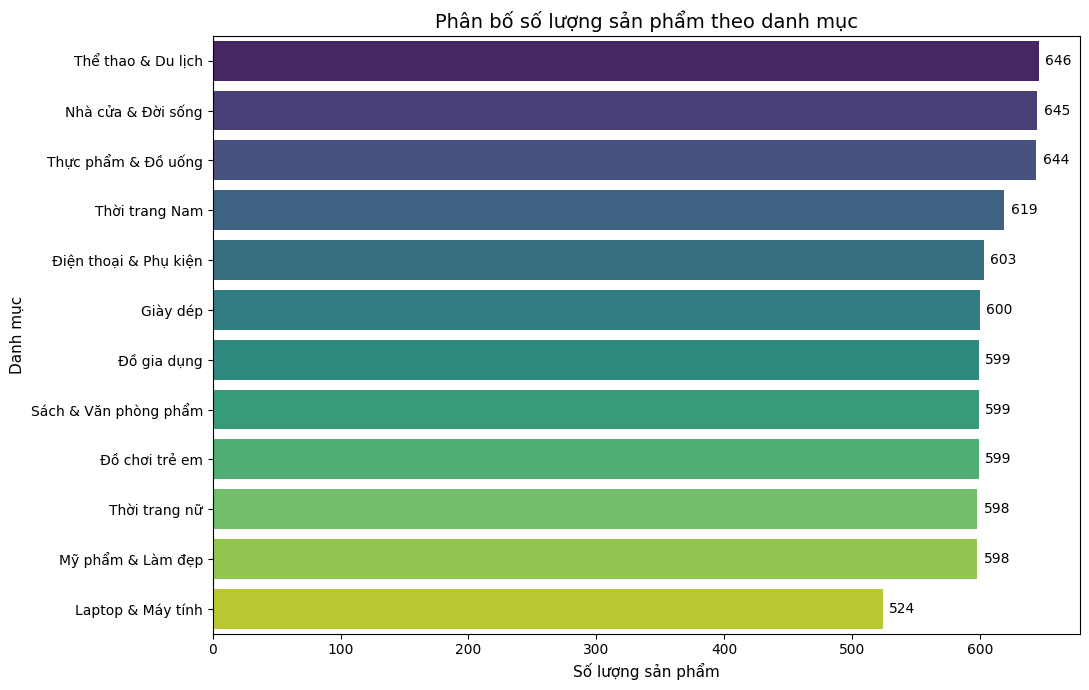

In [5]:
plt.figure(figsize=(11, 7))

ax = sns.countplot(
    y="category",
    data=df_cleaned,
    order=df_cleaned["category"].value_counts().index,
    palette="viridis"
)

plt.title("Phân bố số lượng sản phẩm theo danh mục", fontsize=14)
plt.xlabel("Số lượng sản phẩm", fontsize=11)
plt.ylabel("Danh mục", fontsize=11)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 5,                      
        p.get_y() + p.get_height() / 2,
        f"{int(width)}",
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.savefig("visualizations/01_class_balance.png", dpi=300)
plt.show()

## 2. Phân bố Brand

In [6]:
brand_counts = df_cleaned["brand"].value_counts()
num_single_brands = (brand_counts == 1).sum()
print("Số brand:", df_cleaned["brand"].nunique())
print("Số brand chỉ xuất hiện 1 lần:", num_single_brands)
print("Tỷ lệ brand chỉ xuất hiện 1 lần: {:.2f}%".format(num_single_brands / len(brand_counts) * 100))
print("\nTop 20 brand phổ biến nhất:")

top_brands = df_cleaned["brand"].value_counts().nlargest(20)
top_brands

Số brand: 1511
Số brand chỉ xuất hiện 1 lần: 761
Tỷ lệ brand chỉ xuất hiện 1 lần: 50.36%

Top 20 brand phổ biến nhất:


brand
OEM                    555
Thực phẩm & Đồ uống    177
VITAMIN HOUSE          120
Haint Boutique          90
Biti's                  86
Deli                    81
Xiaomi                  81
BIGGBEN                 75
Naturehike              74
UNDER ARMOUR            70
Elmich                  61
Philips                 60
Coleman                 55
Samsung                 53
MINIIN                  47
SPEEDO                  46
CROCS                   46
NXB Trẻ                 45
Rosata                  45
TP-Link                 42
Name: count, dtype: int64

In [7]:
brand_category_diversity = (
    df_cleaned
    .groupby("brand")["category"]
    .nunique()
    .sort_values(ascending=False)
)

brand_category_diversity.describe()

count    1511.000000
mean        1.080079
std         0.370529
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: category, dtype: float64

C:\Users\Bcmyg\AppData\Local\Temp\ipykernel_9916\2265475708.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


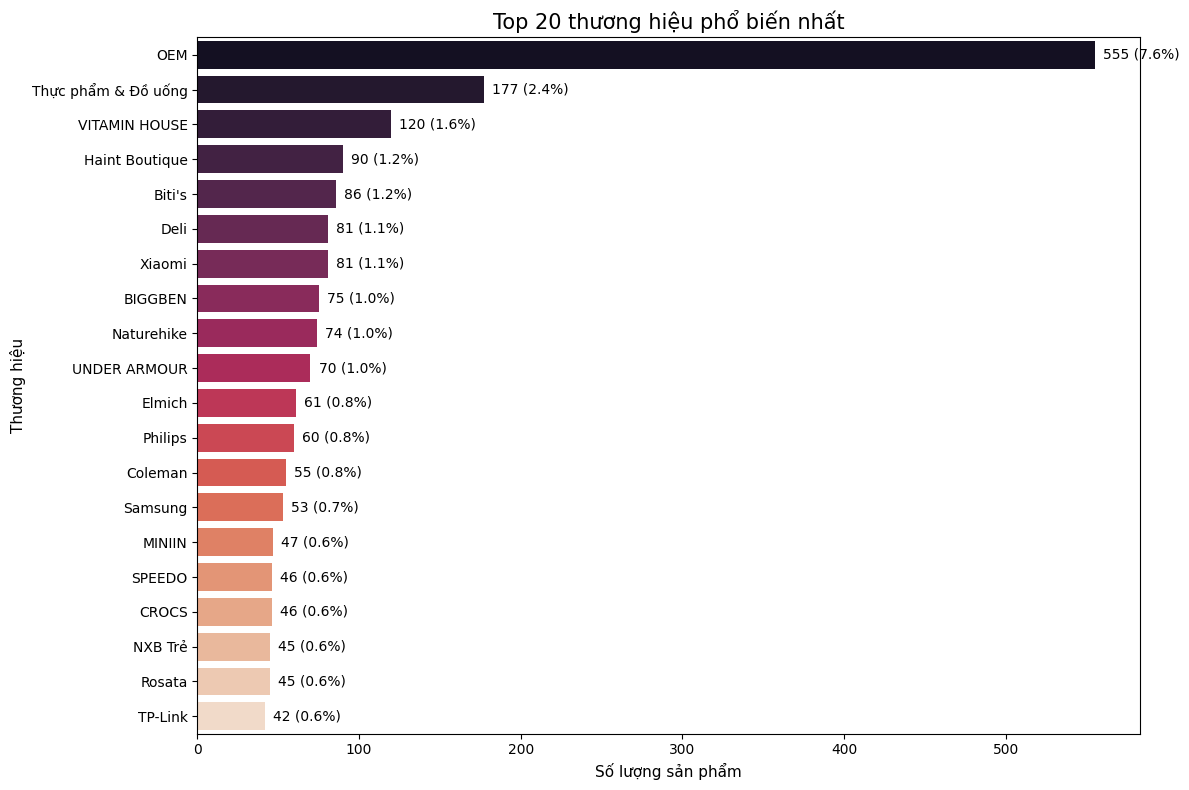

In [8]:
plt.figure(figsize=(12, 8))

top_20_brands = (
    df_cleaned["brand"]
    .value_counts()
    .head(20)
)

ax = sns.barplot(
    x=top_20_brands.values,
    y=top_20_brands.index,
    palette="rocket"
)

plt.title("Top 20 thương hiệu phổ biến nhất", fontsize=15)
plt.xlabel("Số lượng sản phẩm", fontsize=11)
plt.ylabel("Thương hiệu", fontsize=11)

#Ghi giá trị + %
total = len(df_cleaned)

for p in ax.patches:
    width = p.get_width()
    percent = width / total * 100
    ax.text(
        width + 5,
        p.get_y() + p.get_height() / 2,
        f"{int(width)} ({percent:.1f}%)",
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.savefig(
    "visualizations/02_top_brands.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

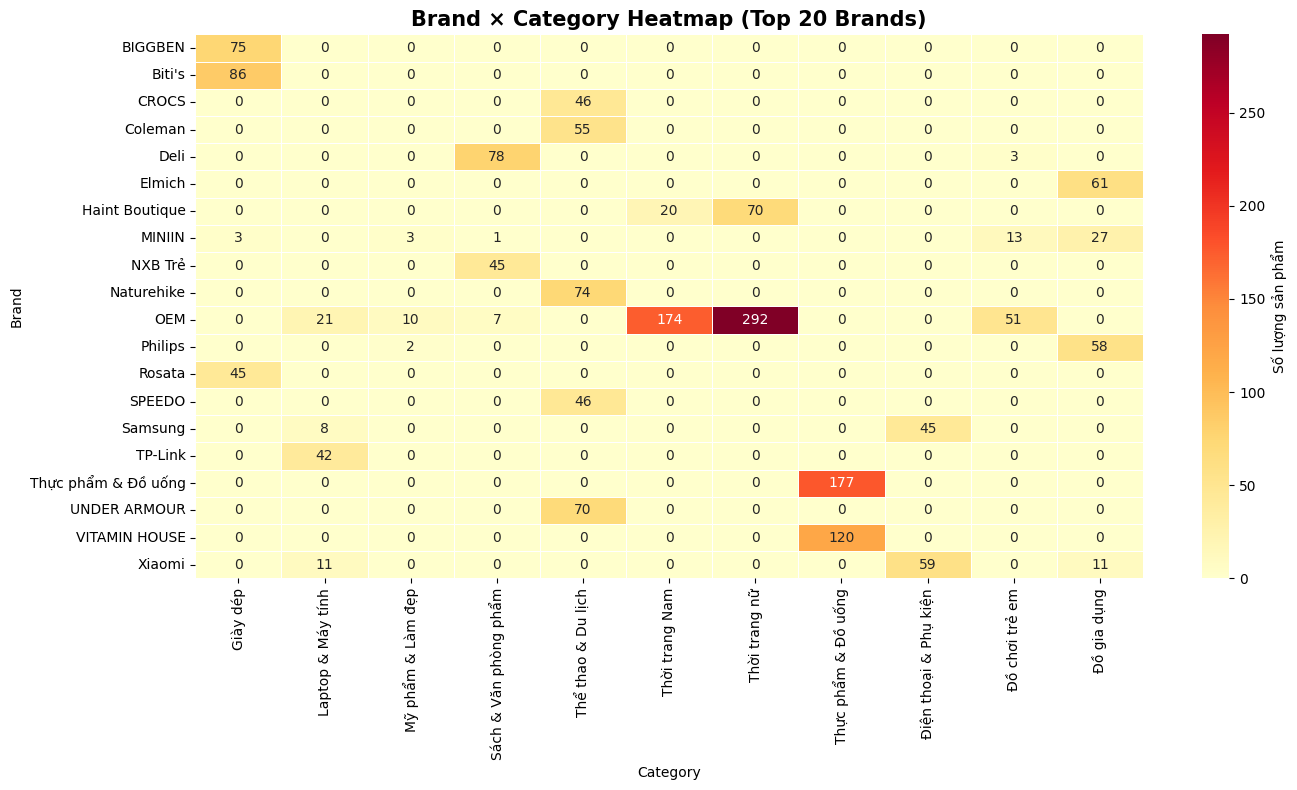

In [9]:
df_top = df_cleaned[df_cleaned["brand"].isin(top_brands.index)]
brand_category_matrix = pd.pivot_table(
    df_top,
    index="brand",
    columns="category",
    values="product_name",
    aggfunc="count",
    fill_value=0
)
plt.figure(figsize=(14, 8))

sns.heatmap(
    brand_category_matrix,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={"label": "Số lượng sản phẩm"}
)

plt.title(
    "Brand × Category Heatmap (Top 20 Brands)",
    fontsize=15,
    weight="bold"
)
plt.xlabel("Category")
plt.ylabel("Brand")

plt.tight_layout()
plt.savefig("visualizations/03_brand_category_heatmap.png", dpi=300)
plt.show()

# II. TEXT CHARACTERISTICS ANALYSIS
## 1. Phân bổ số từ

In [10]:
df_cleaned['name_length'] = df_cleaned['product_name'].str.len()
df_cleaned['desc_length'] = df_cleaned['description'].str.len()
df_cleaned['name_word_count'] = df_cleaned['product_name'].str.split().str.len()
df_cleaned['desc_word_count'] = df_cleaned['description'].str.split().str.len()

print("Thống kê độ dài:")
print(f"Product name - Trung bình: {df_cleaned['name_length'].mean():.1f} ký tự")
print(f"Description - Trung bình: {df_cleaned['desc_length'].mean():.1f} ký tự")
print(f"Product name - Trung bình: {df_cleaned['name_word_count'].mean():.1f} từ")
print(f"Description - Trung bình: {df_cleaned['desc_word_count'].mean():.1f} từ")

Thống kê độ dài:
Product name - Trung bình: 62.0 ký tự
Description - Trung bình: 1281.5 ký tự
Product name - Trung bình: 13.3 từ
Description - Trung bình: 288.6 từ


In [11]:
df_cleaned["name_word_count"].describe()

count    7274.000000
mean       13.275364
std         6.870684
min         2.000000
25%         8.000000
50%        11.000000
75%        17.000000
max        59.000000
Name: name_word_count, dtype: float64

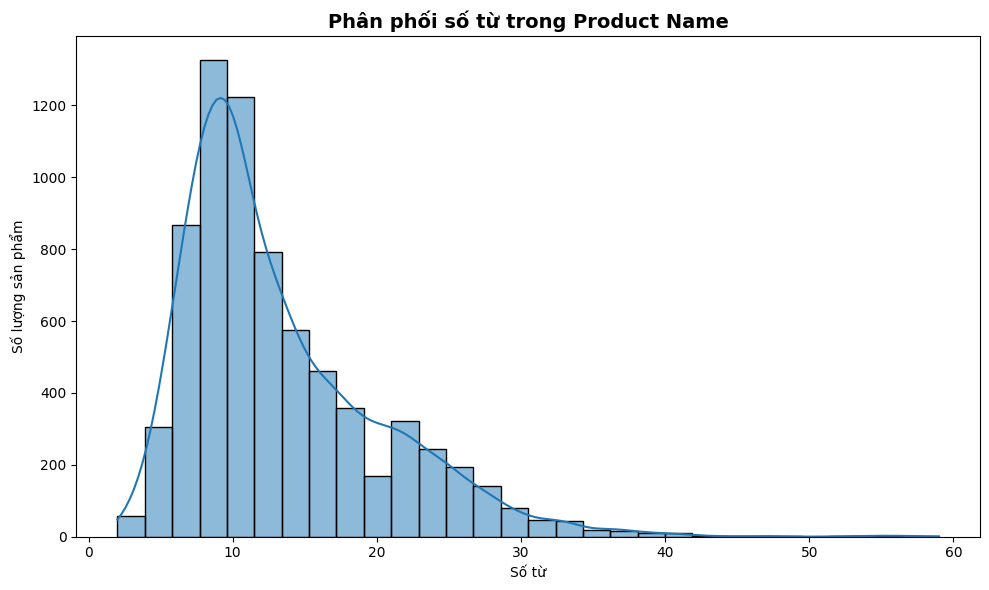

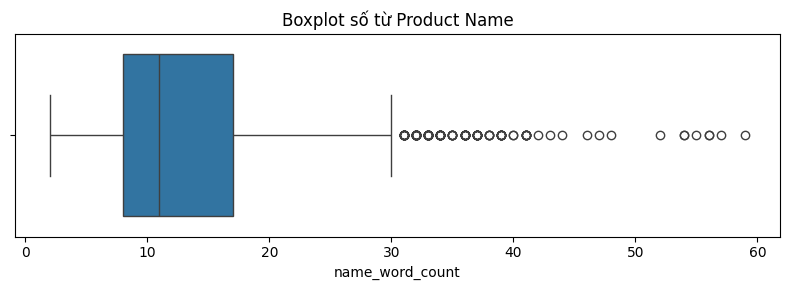

In [12]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_cleaned["name_word_count"],
    bins=30,
    kde=True
)

plt.title("Phân phối số từ trong Product Name", fontsize=14, weight="bold")
plt.xlabel("Số từ")
plt.ylabel("Số lượng sản phẩm")

plt.tight_layout()
plt.savefig("visualizations/04_name_word_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df_cleaned["name_word_count"])
plt.title("Boxplot số từ Product Name")
plt.tight_layout()
plt.savefig("visualizations/05_name_word_boxplot.png", dpi=300)
plt.show()

In [13]:
df_cleaned["desc_word_count"].describe()

count    7274.000000
mean      288.592109
std       244.841028
min         5.000000
25%       108.000000
50%       222.000000
75%       412.000000
max      3135.000000
Name: desc_word_count, dtype: float64

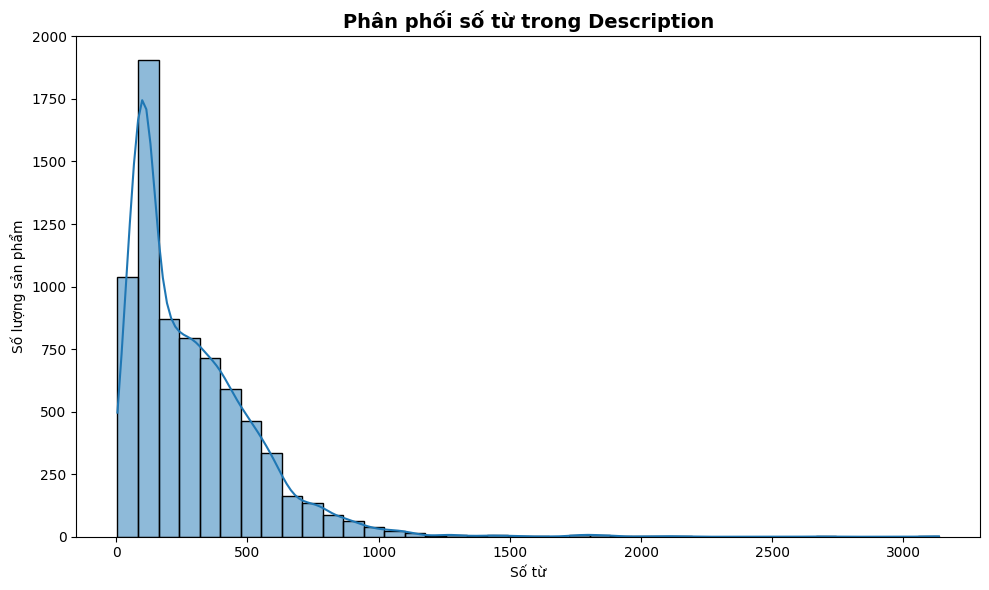

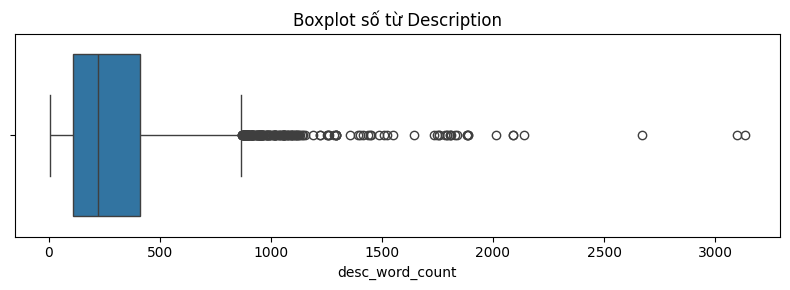

In [14]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_cleaned["desc_word_count"],
    bins=40,
    kde=True
)

plt.title("Phân phối số từ trong Description", fontsize=14, weight="bold")
plt.xlabel("Số từ")
plt.ylabel("Số lượng sản phẩm")

plt.tight_layout()
plt.savefig("visualizations/06_description_word_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df_cleaned["desc_word_count"])
plt.title("Boxplot số từ Description")
plt.tight_layout()
plt.savefig("visualizations/07_description_word_boxplot.png", dpi=300)
plt.show()

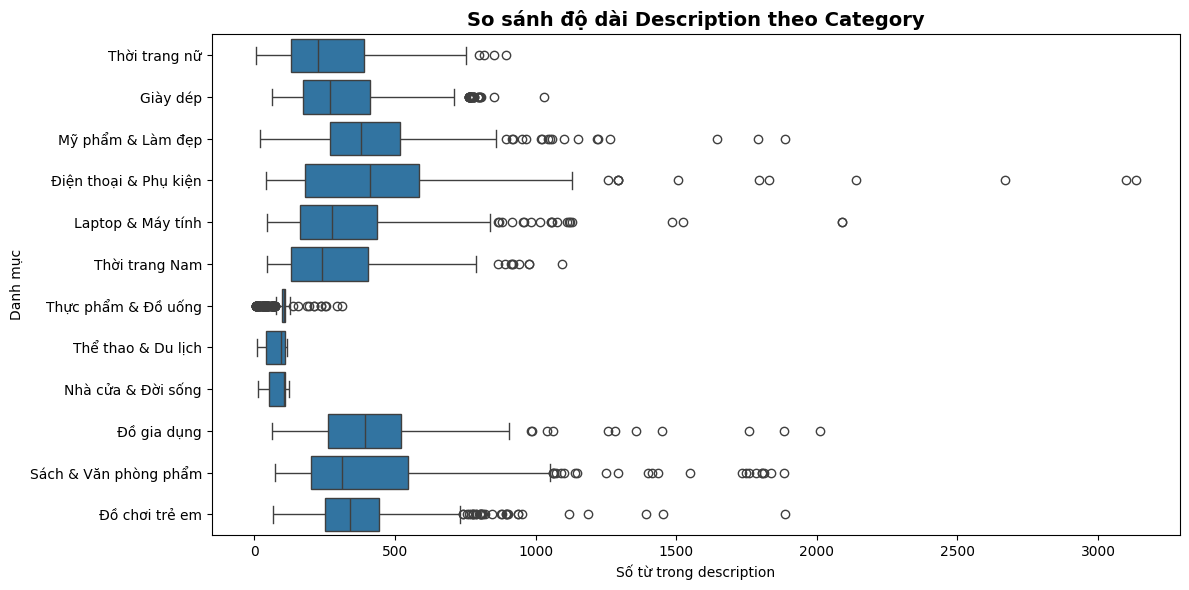

In [15]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    y="category",
    x="desc_word_count",
    data=df_cleaned
)

plt.title("So sánh độ dài Description theo Category", fontsize=14, weight="bold")
plt.xlabel("Số từ trong description")
plt.ylabel("Danh mục")

plt.tight_layout()
plt.savefig("visualizations/08_desc_length_by_category.png", dpi=300)
plt.show()

## 2. WordCloud

In [17]:
from wordcloud import WordCloud
from underthesea import word_tokenize

In [18]:
vietnamese_stopwords = set([
    "và", "là", "có", "cho", "với", "các", "được", "trong", "khi", "từ",
    "sản", "phẩm", "này", "không", "một", "những", "đến", "theo",
    "giúp", "đảm", "bảo", "hàng", "chính", "hãng", "của", "tại", "rất", "sản_phẩm", "chính_hãng", "bảo_hành", "thương_hiệu", 
    "chất_lượng", "cao_cấp", "thiết_kế", "sử_dụng", "thời_gian",
    "cam_kết", "uy_tín", "hỗ_trợ", "miễn_phí", "giao_hàng", "toàn_quốc", "đổi_trả", "dễ_dàng", "tiện_lợi"
])
def tokenize_and_remove_stopwords(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    
    tokens = word_tokenize(text, format="text").split()
    
    clean_tokens = []
    for token in tokens:
        token_lower = token.lower()
        if (token_lower not in vietnamese_stopwords) and \
           (not token.isnumeric()) and \
           (len(token) > 1) and \
           (token.isalnum() or "_" in token):
            clean_tokens.append(token)
    return " ".join(clean_tokens)

In [19]:
df_cleaned["desc_tokenized"] = df_cleaned["description"].apply(tokenize_and_remove_stopwords)
df_cleaned["name_tokenized"]= df_cleaned["product_name"].apply(tokenize_and_remove_stopwords)

In [20]:
def get_top_keywords(text_series, n=10):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

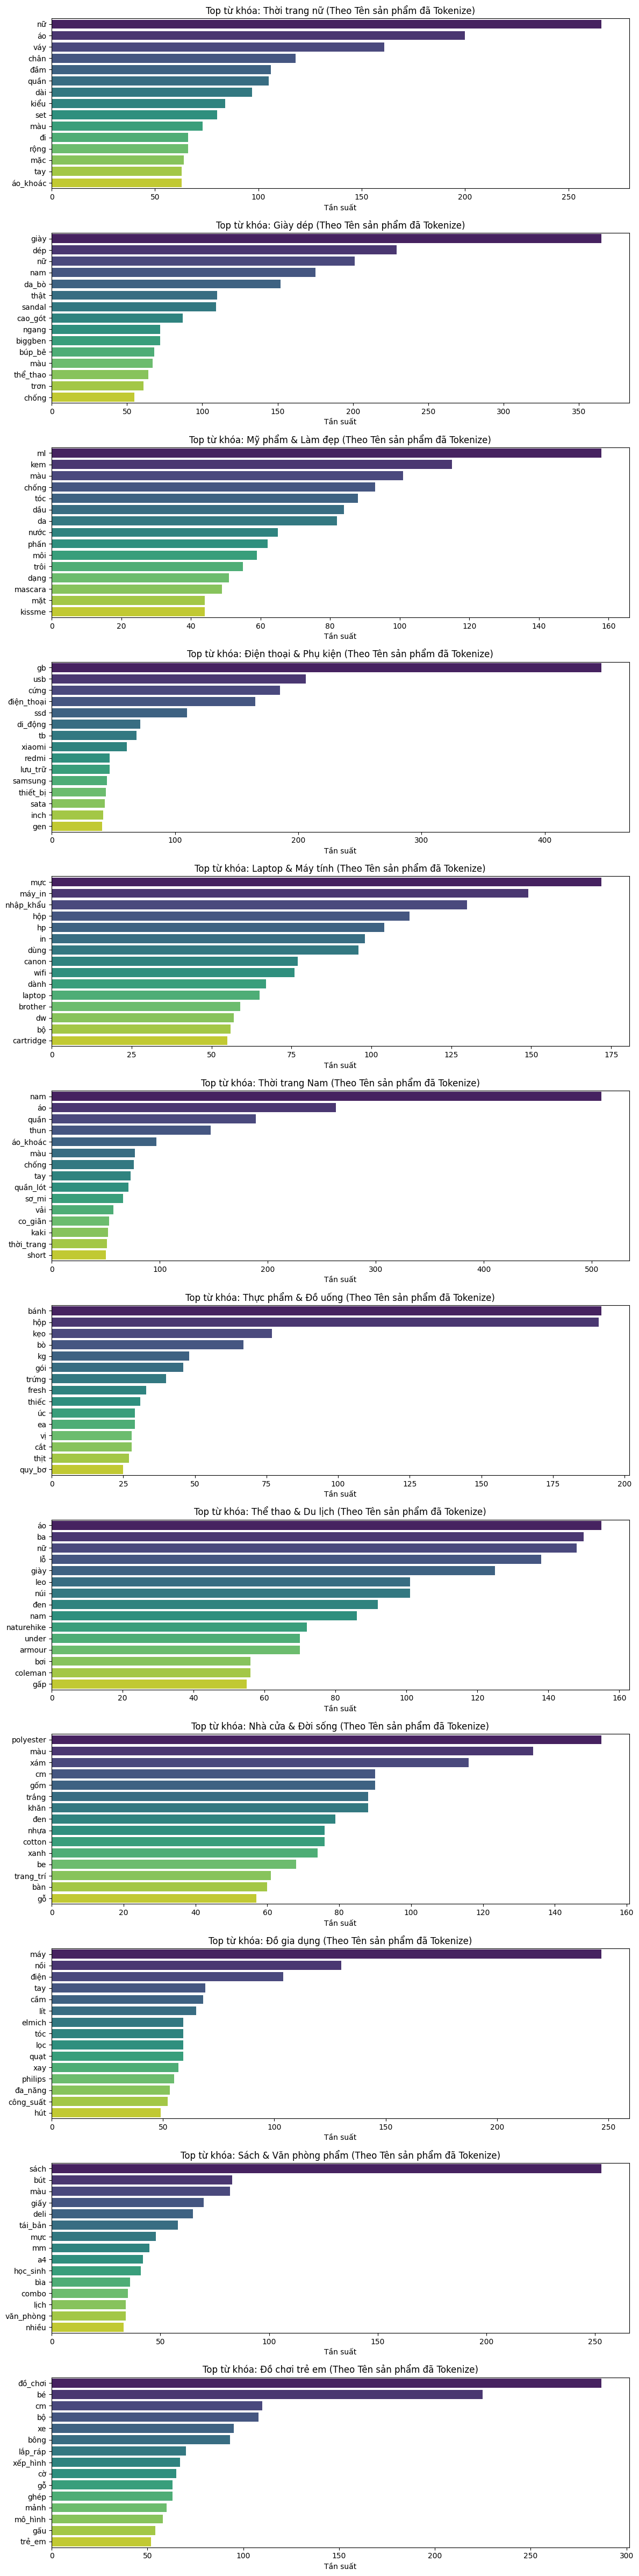

In [21]:
categories = df_cleaned['category'].unique()
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(12, 4 * len(categories)))

for i, cat in enumerate(categories):
    subset = df_cleaned[df_cleaned['category'] == cat]
    
    top_words = get_top_keywords(subset['name_tokenized'], n=15)    
    words = [w[0] for w in top_words]
    counts = [w[1] for w in top_words]
    
    ax = axes[i] if len(categories) > 1 else axes
    sns.barplot(x=counts, y=words, hue=words, legend=False, ax=axes[i], palette='viridis')
    ax.set_title(f"Top từ khóa: {cat} (Theo Tên sản phẩm đã Tokenize)")
    ax.set_xlabel("Tần suất")

plt.tight_layout()
plt.savefig("visualizations/09_top_keywords_per_category.png", dpi=300)
plt.show()

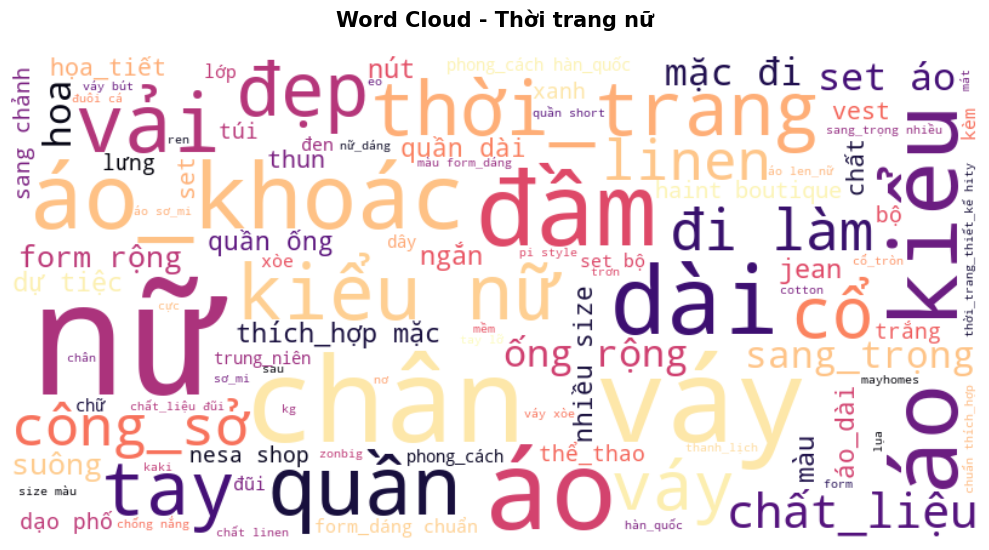

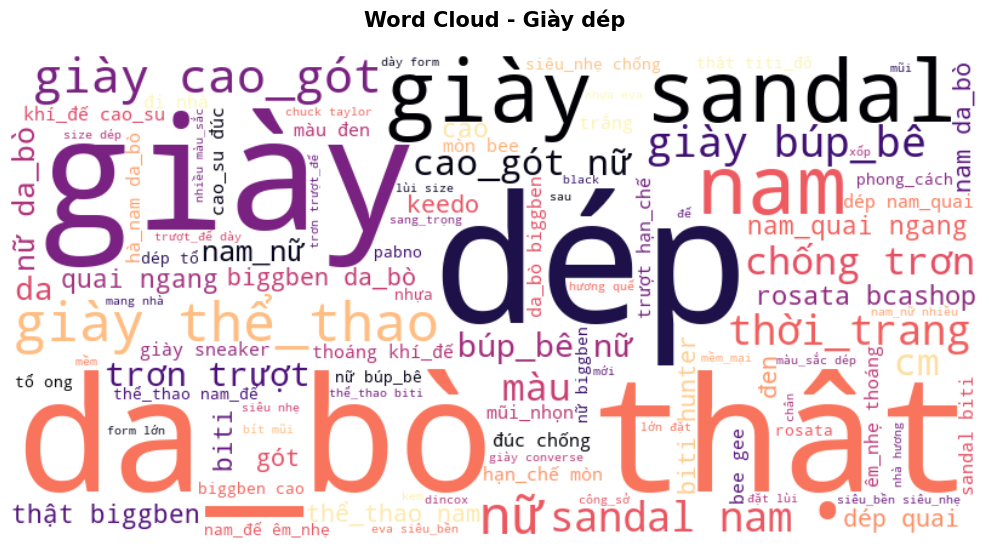

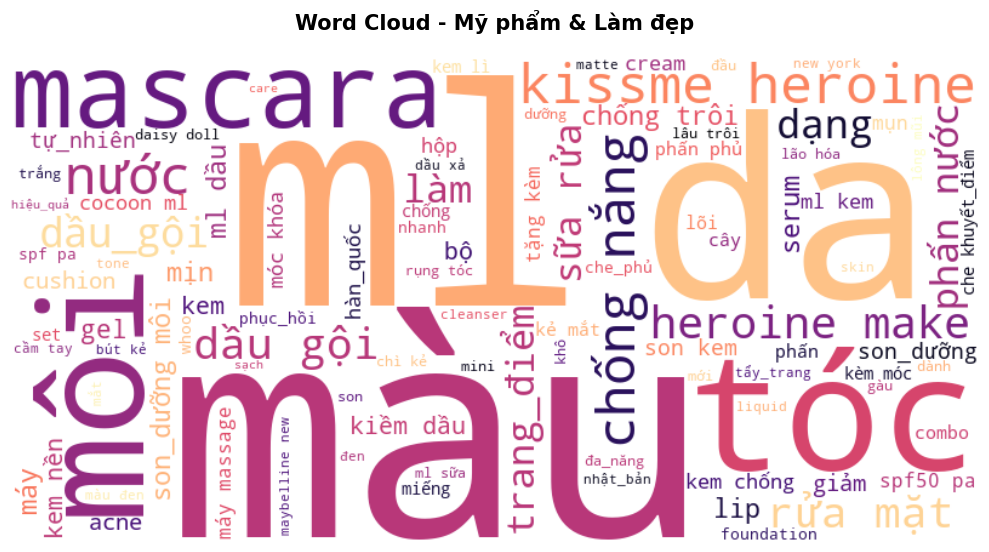

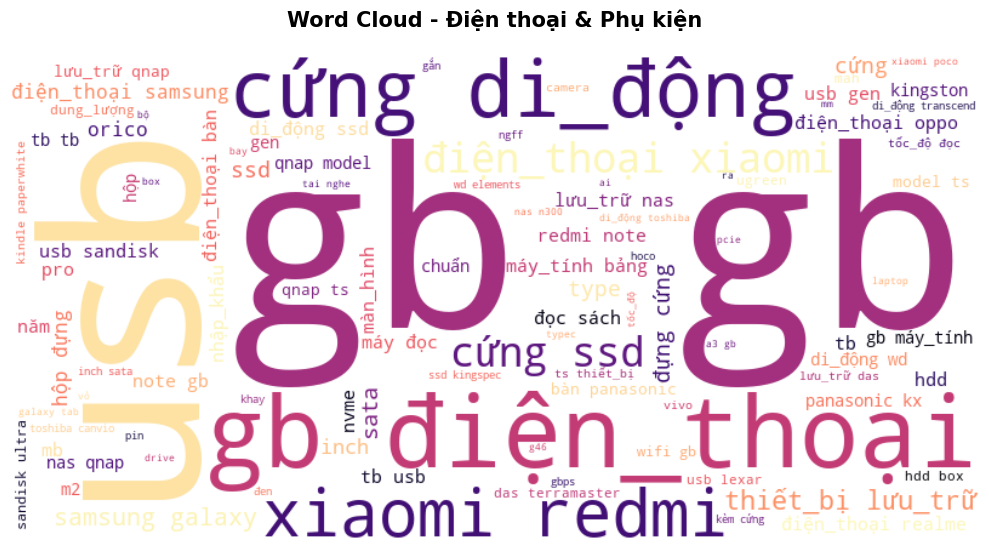

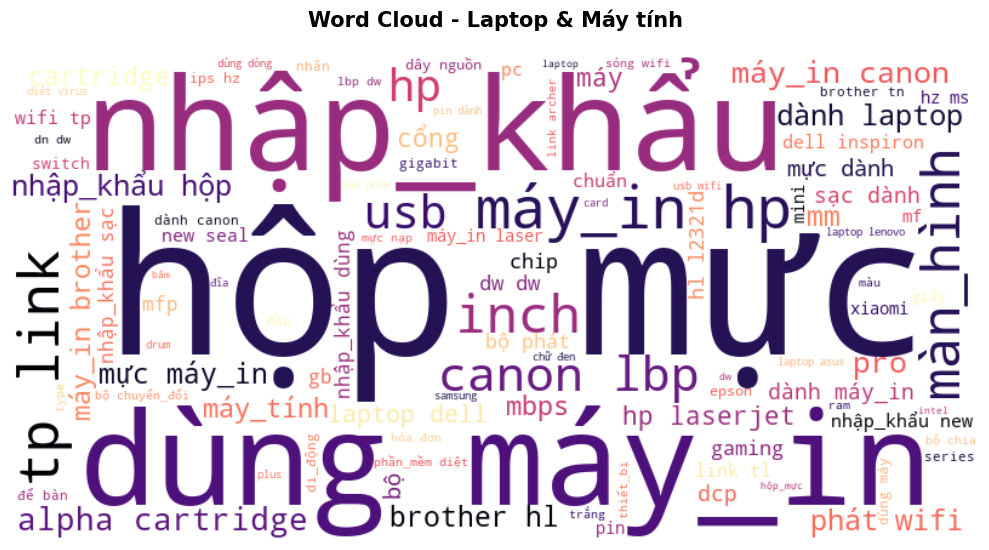

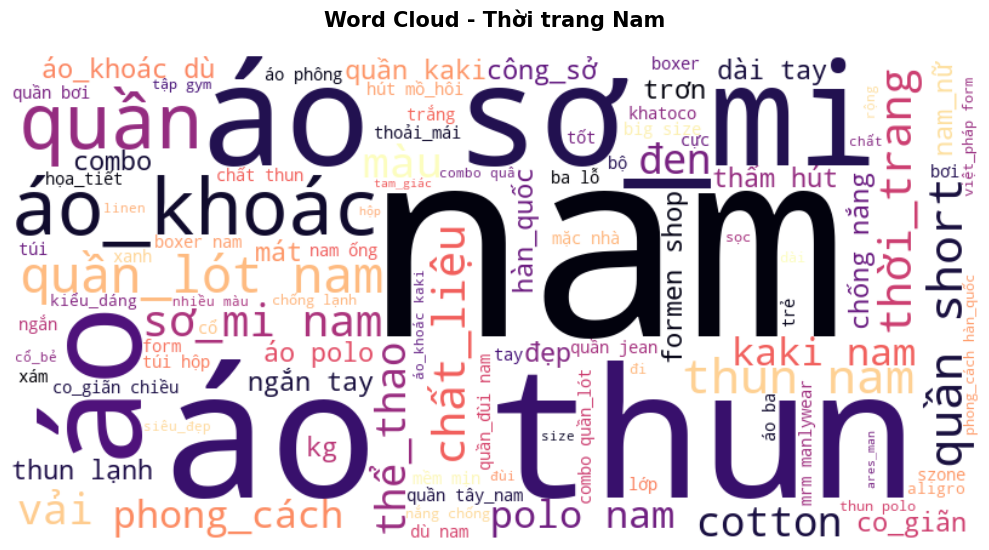

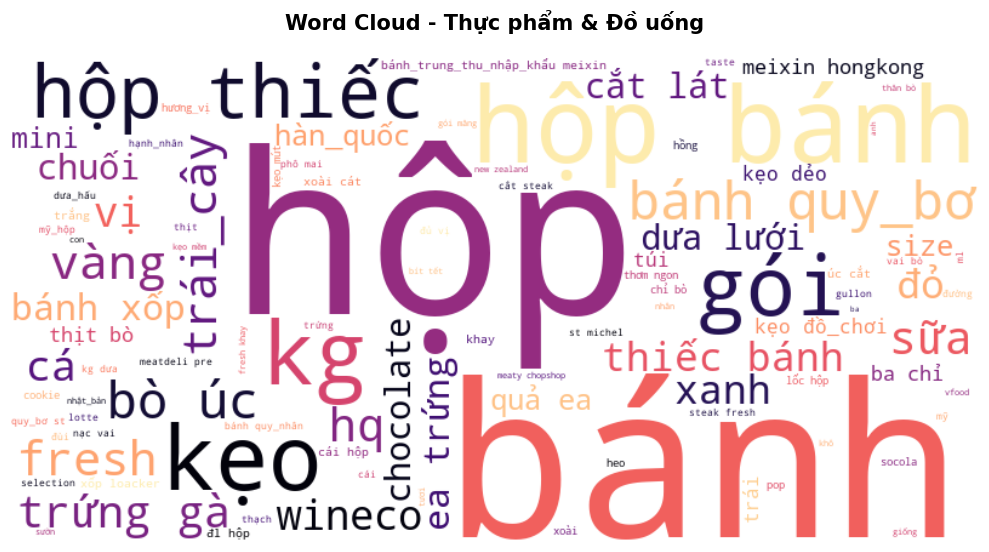

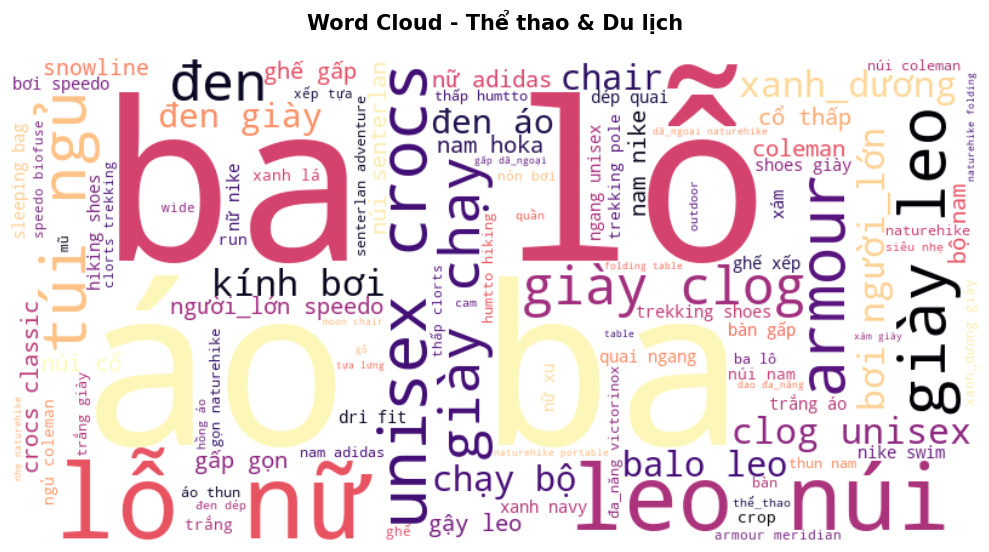

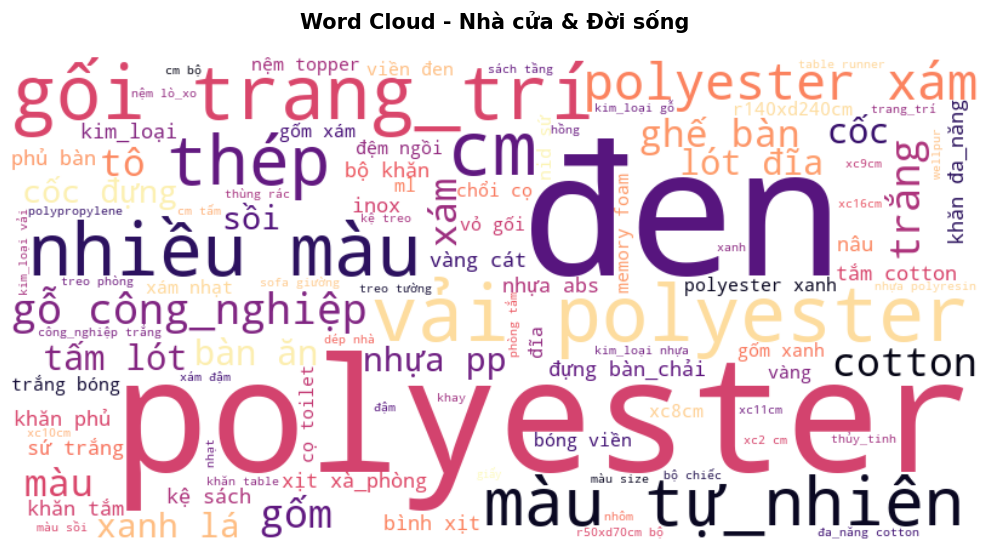

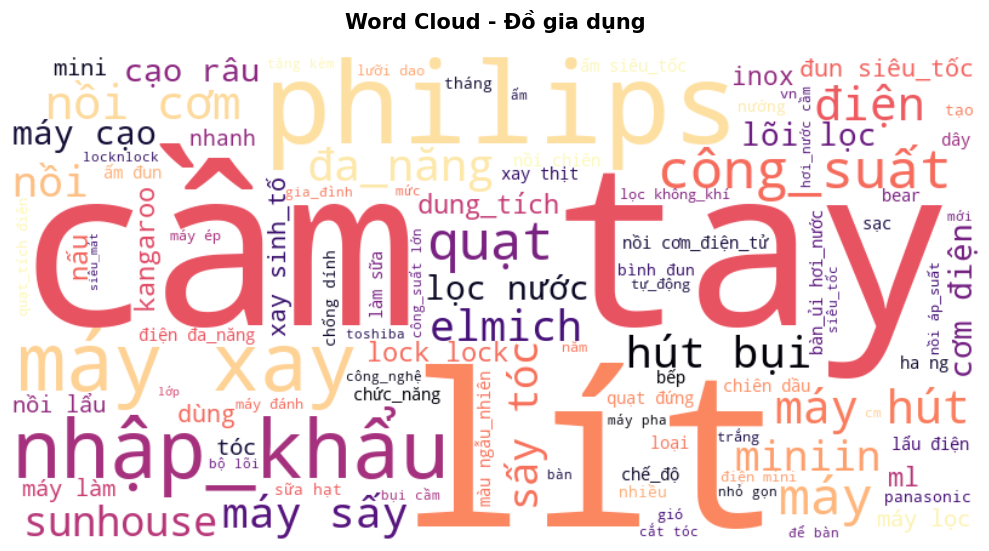

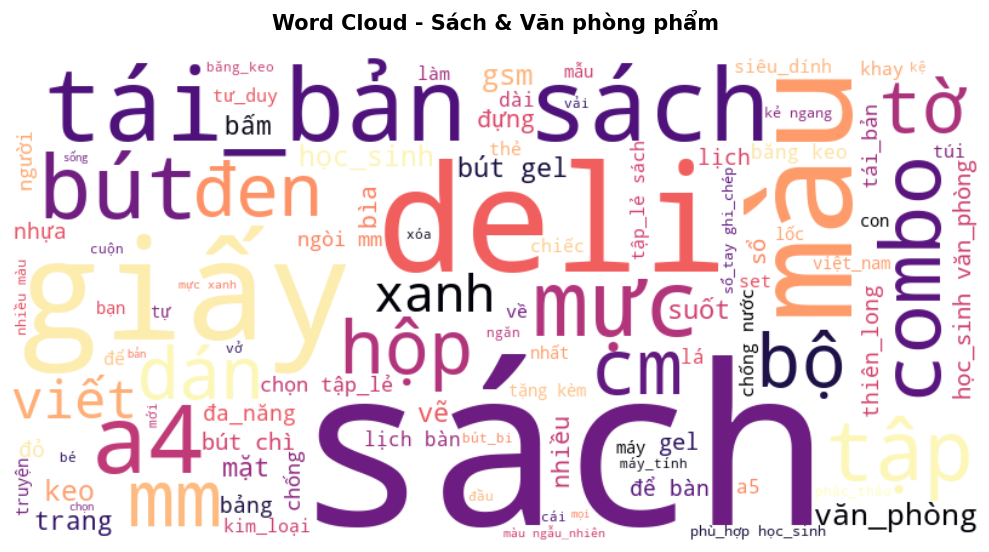

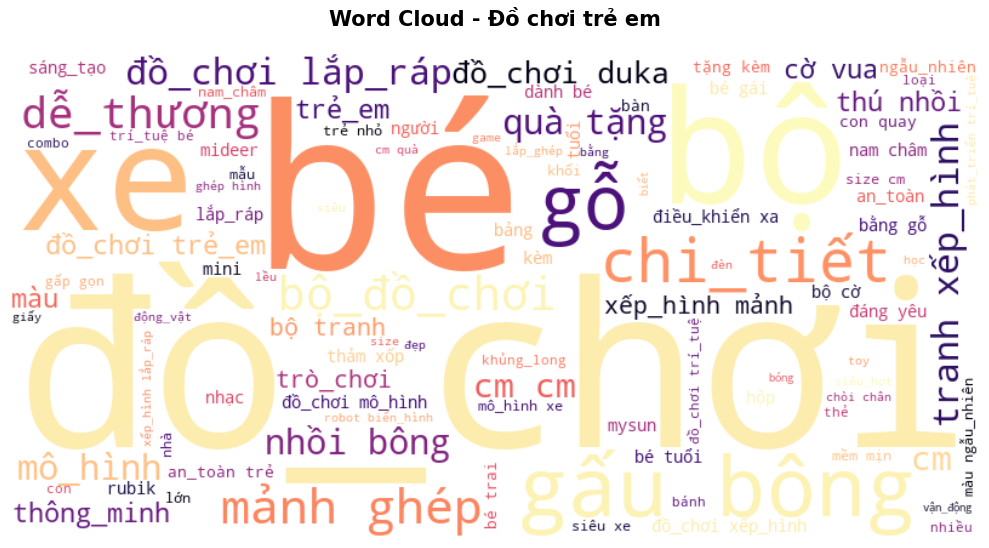

In [22]:
start = 10
for i, cat in enumerate(categories):
    text = ' '.join(df_cleaned[df_cleaned['category'] == cat]['name_tokenized'])
    
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=100,
        colormap='magma'  
    ).generate(text)

    plt.figure(figsize=(10, 6))  
    save_path = f"visualizations/{start:02d}_wordcloud_{cat}.png"
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {cat}", fontsize=15, pad = 20, weight = 'bold')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    start += 1